# control_feature_extraction

Import the neccesary libraries

In [1]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

Look for the datasets the belong in the control group and combined them into a data frame

In [2]:
folder_path = 'EyeT'

file_pattern = os.path.join(folder_path, '*dataset_II_*.csv')

files = glob.glob(file_pattern)

dfs = []

for file in files:
    df = pd.read_csv(file, low_memory=False)
    dfs.append(df)

result_df = pd.concat(dfs, ignore_index=True)

Function to plot the percentage of NAs values

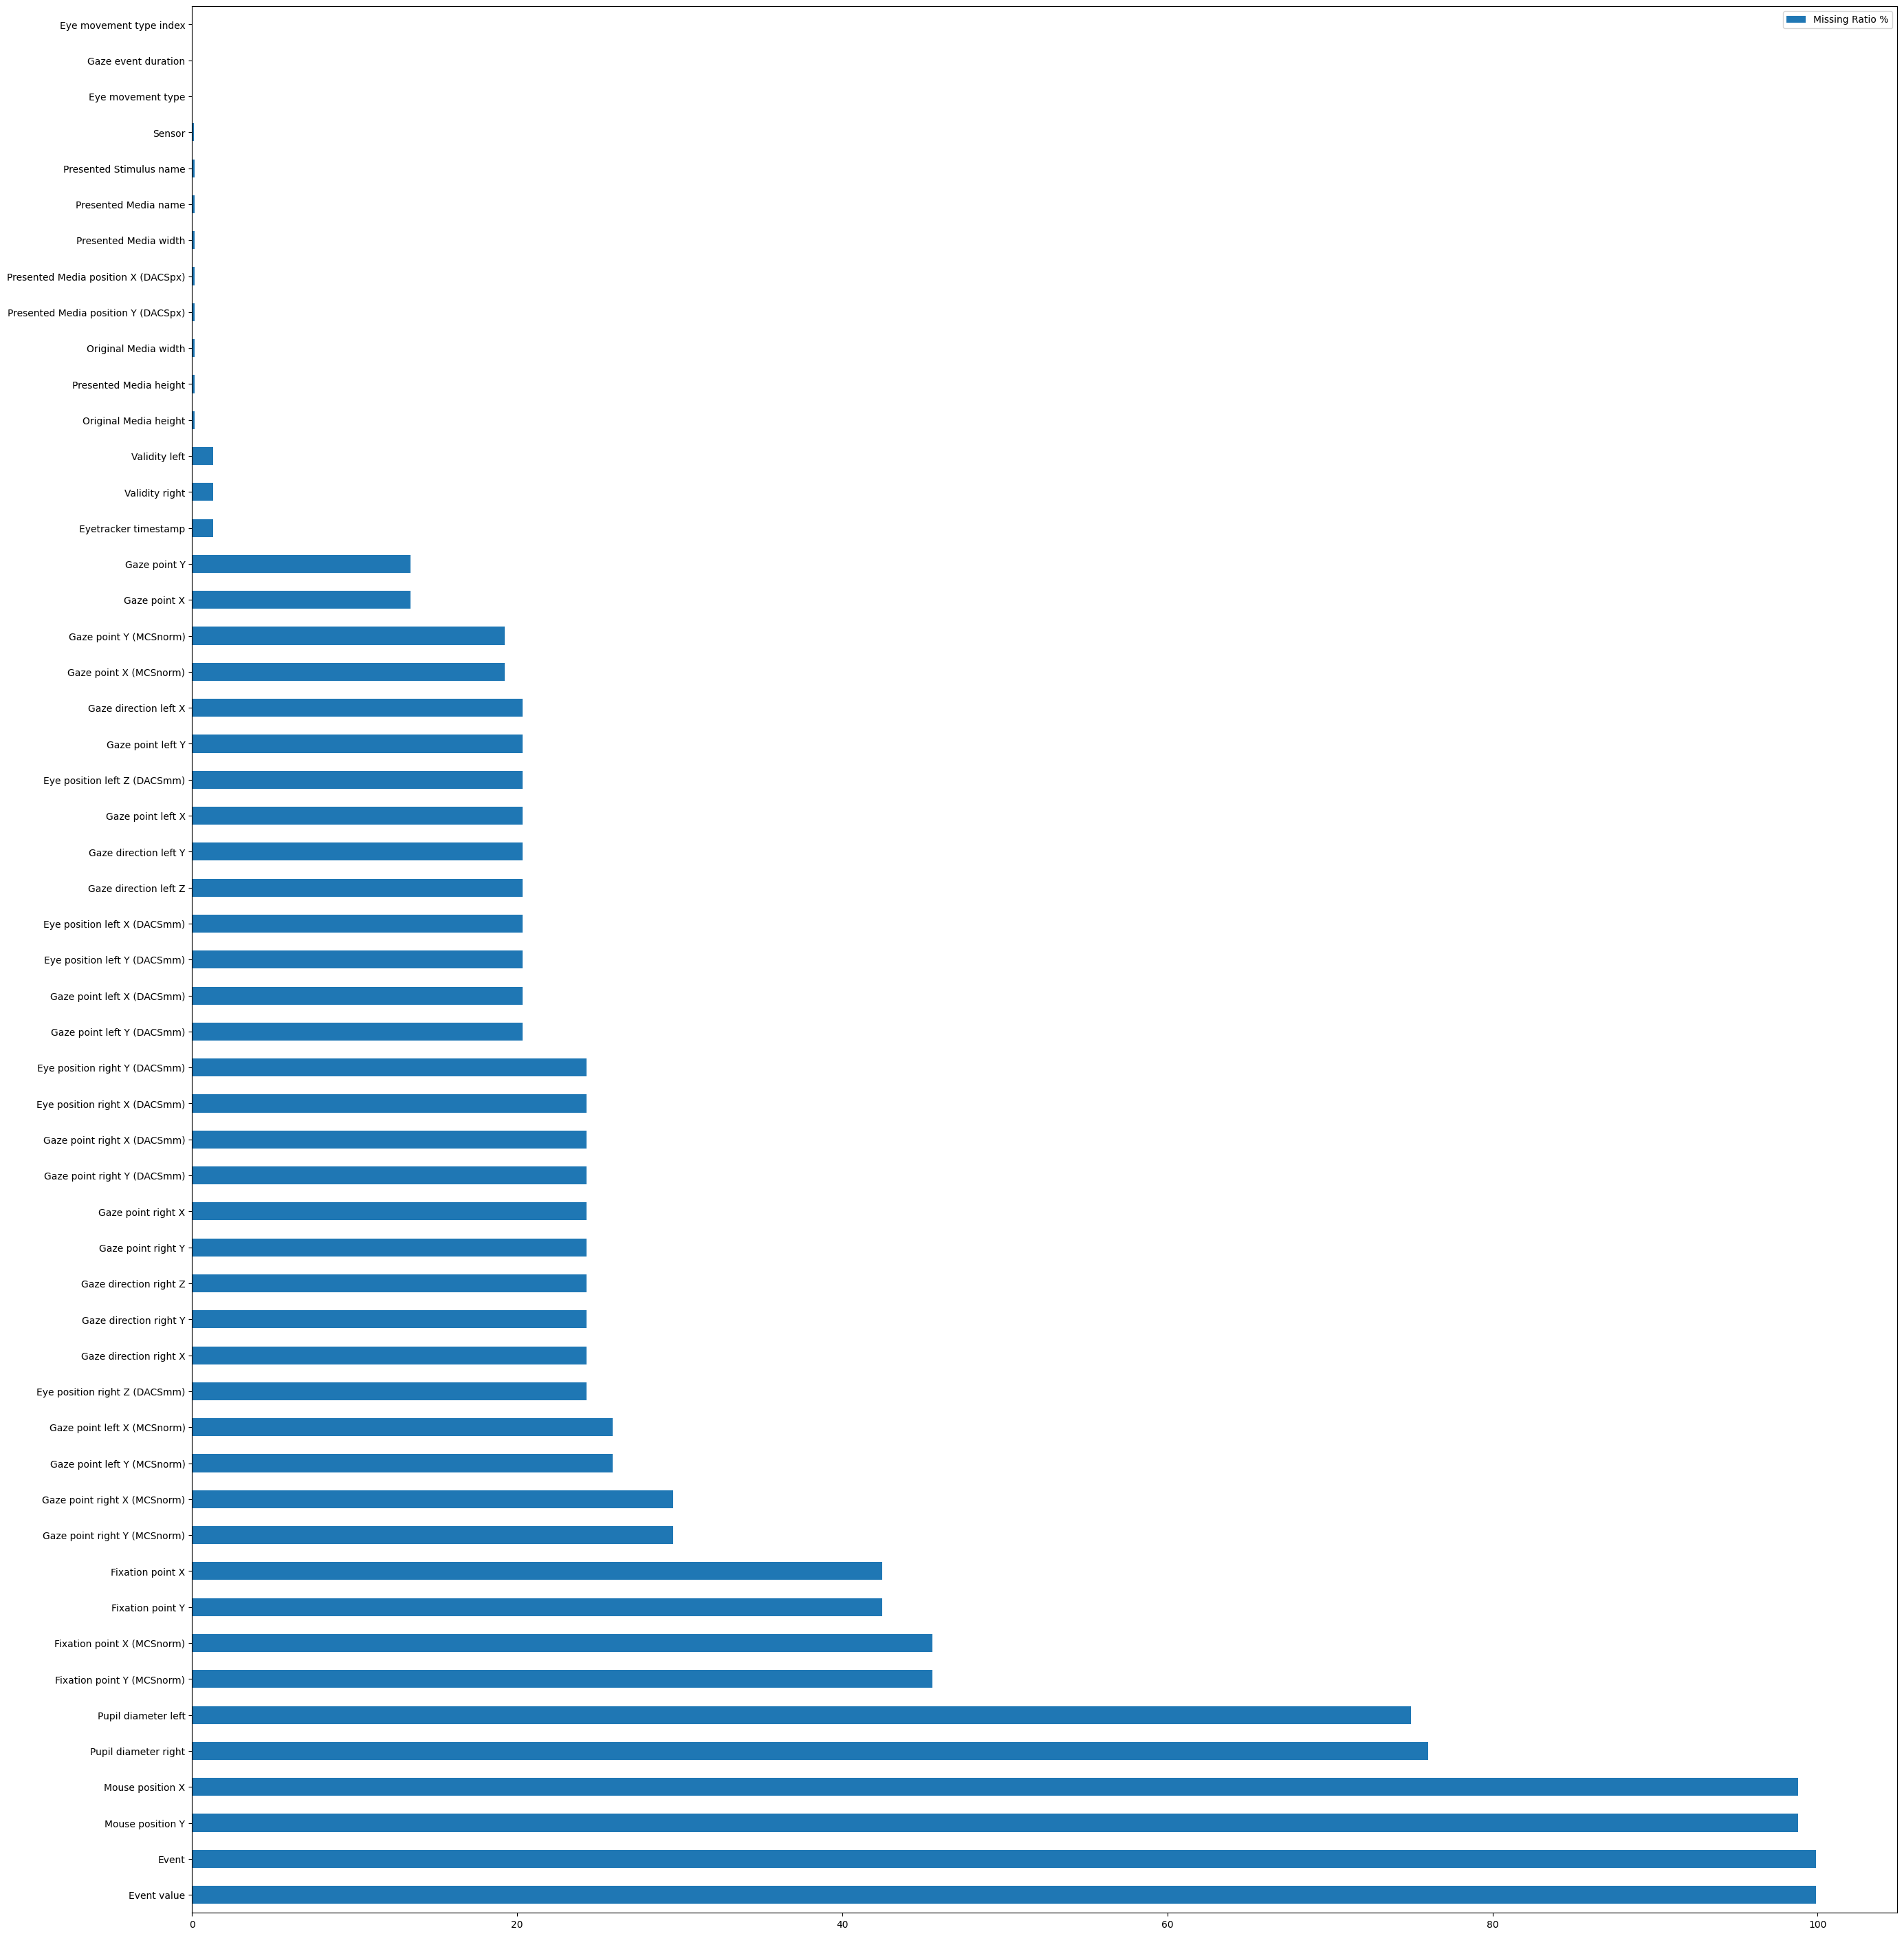

In [3]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", figsize=(32,36))
        plt.show()
    else:
        print('No NAs found')

plot_nas(result_df)

In [4]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067562 entries, 0 to 1067561
Data columns (total 71 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   Unnamed: 0                           1067562 non-null  int64  
 1   Recording timestamp                  1067562 non-null  int64  
 2   Computer timestamp                   1067562 non-null  int64  
 3   Sensor                               1066426 non-null  object 
 4   Project name                         1067562 non-null  object 
 5   Export date                          1067562 non-null  object 
 6   Participant name                     1067562 non-null  object 
 7   Recording name                       1067562 non-null  object 
 8   Recording date                       1067562 non-null  object 
 9   Recording date UTC                   1067562 non-null  object 
 10  Recording start time                 1067562 non-null  object 
 11

A for to look for all the unique values in each column

In [5]:
for col in result_df:
    print(col, result_df[col].unique())

Unnamed: 0 [   670    671    672 ... 125731 125732 125733]
Recording timestamp [ 4700647  4702390  4710662 ... 64539599 64542626 64550925]
Computer timestamp [189489558037 189489559780 189489568052 ...   2341680087   2341683114
   2341691413]
Sensor [nan 'Eye Tracker' 'Mouse']
Project name ['Participant0020' 'Participant0012' 'Control group experiment'
 'Participant0050' 'Participant0040' 'Participant0030' 'Participant0056'
 'Participånt0014' 'Participant0026' 'Participant0036' 'Participant0018'
 'Participant0046' 'Participants0054' 'Participant0024' 'Participant0016'
 'Participant0048' 'Participant0038' 'Participant0034' 'Participant0058'
 'Participant0044' 'Participant0028' 'Participant0060' 'Participant10'
 'Participant0022' 'Participant0052' 'Participant0032' 'Participant0042']
Export date ['05.02.2021' '29.10.2020' '06.10.2020' '07.10.2020' '24.08.2021'
 '20.10.2020' '16.03.2021' '18.02.2021' '08.09.2021' '25.11.2020'
 '30.09.2020' '17.02.2021' '13.03.2021' '16.08.2021' '10.02.202

Validity right [nan 'Invalid' 'Valid']
Eye position left X (DACSmm) [nan '194,3' '194,4' ... '300,1' '298,9' '295,0']
Eye position left Y (DACSmm) [nan '54,8' '54,9' ... '-112,7' '-112,8' '-112,9']
Eye position left Z (DACSmm) [nan '591,3' '591,2' ... '402,2' '405,2' '410,8']
Eye position right X (DACSmm) [nan '263,1' '263,2' ... '166,5' '174,3' '165,5']
Eye position right Y (DACSmm) [nan '64,2' '64,3' ... '-111,6' '-111,5' '-111,3']
Eye position right Z (DACSmm) [nan '566,5' '566,4' ... '394,8' '397,7' '405,4']
Gaze point left X (DACSmm) [nan '204,3' '205,2' ... '-29,7' '-13,6' '-55,9']
Gaze point left Y (DACSmm) [nan '139,6' '130,3' ... '387,4' '343,3' '339,1']
Gaze point right X (DACSmm) [nan '252,6' '246,6' ... '517,8' '527,7' '563,8']
Gaze point right Y (DACSmm) [nan '117,2' '119,3' ... '312,2' '371,1' '321,3']
Gaze point X (MCSnorm) [nan '0,3276' '0,3303' ... '0,9953' '0,9823' '0,9862']
Gaze point Y (MCSnorm) [nan '0,4722' '0,4409' ... '0,9435' '0,9775' '0,9764']
Gaze point left 

Drop the not neccesary columns

In [6]:
result_df = result_df.drop(['Unnamed: 0','Recording timestamp','Computer timestamp','Sensor','Project name','Export date',
              'Recording date','Recording date UTC','Recording start time','Recording start time UTC',
              'Recording duration','Timeline name','Recording Fixation filter name','Recording software version',
              'Recording resolution height','Recording resolution width','Recording monitor latency',
              'Eyetracker timestamp','Event','Event value','Presented Stimulus name','Presented Media name',
              'Presented Media width','Presented Media height','Presented Media position X (DACSpx)',
              'Presented Media position Y (DACSpx)','Original Media width','Original Media height',
              'Mouse position X','Mouse position Y','Gaze point X','Gaze point Y','Gaze point left X','Gaze point left Y',
              'Gaze point right X','Gaze point right Y','Gaze point left X (DACSmm)','Gaze point left Y (DACSmm)',
              'Gaze point right X (DACSmm)','Gaze point right Y (DACSmm)','Fixation point X','Fixation point Y','Validity left',
              'Validity right','Eye position left X (DACSmm)','Eye position left Y (DACSmm)','Eye position left Z (DACSmm)',
              'Eye position right X (DACSmm)','Eye position right Y (DACSmm)','Eye position right Z (DACSmm)',
              'Eye movement type','Eye movement type index'],axis=1)

Decided to keep this columns to then see how each of them looks like in the histogram

In [7]:
result_df

,Participant name,Recording name,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil diameter left,Pupil diameter right,Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze point left X (MCSnorm),Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Gaze event duration,Fixation point X (MCSnorm),Fixation point Y (MCSnorm)
0,Participant0020,Recording1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN
1,Participant0020,Recording1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN
2,Participant0020,Recording1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN
3,Participant0020,Recording1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN
4,Participant0020,Recording1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067557,Participant0002,Recording2,"0,05114","0,12349","-0,99103","-0,03268","0,08974","-0,99543","3,07","3,26",NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN
1067558,Participant0002,Recording2,"0,05045","0,12288","-0,99114","-0,03230","0,08740","-0,99565",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN
1067559,Participant0002,Recording2,"0,05023","0,12429","-0,99097","-0,03604","0,09226","-0,99508",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN
1067560,Participant0002,Recording2,"0,05206","0,12188","-0,99118","-0,03646","0,08632","-0,99560","3,15","3,24",NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN


Replace commas for dots

In [8]:
result_df['Gaze point X (MCSnorm)'] = result_df['Gaze point X (MCSnorm)'].str.replace(',', '.').astype(float)
result_df['Gaze point Y (MCSnorm)'] = result_df['Gaze point Y (MCSnorm)'].str.replace(',', '.').astype(float)
result_df['Pupil diameter left'] = result_df['Pupil diameter left'].str.replace(',', '.').astype(float)
result_df['Pupil diameter right'] = result_df['Pupil diameter right'].str.replace(',', '.').astype(float)
result_df['Gaze direction left X'] = result_df['Gaze direction left X'].str.replace(',', '.').astype(float)
result_df['Gaze direction left Y'] = result_df['Gaze direction left Y'].str.replace(',', '.').astype(float)
result_df['Gaze direction left Z'] = result_df['Gaze direction left Z'].str.replace(',', '.').astype(float)
result_df['Gaze direction right X'] = result_df['Gaze direction right X'].str.replace(',', '.').astype(float)
result_df['Gaze direction right Y'] = result_df['Gaze direction right Y'].str.replace(',', '.').astype(float)
result_df['Gaze direction right Z'] = result_df['Gaze direction right Z'].str.replace(',', '.').astype(float)
result_df['Gaze point left X (MCSnorm)'] = result_df['Gaze point left X (MCSnorm)'].str.replace(',', '.').astype(float)
result_df['Gaze point left Y (MCSnorm)'] = result_df['Gaze point left Y (MCSnorm)'].str.replace(',', '.').astype(float)
result_df['Gaze point right X (MCSnorm)'] = result_df['Gaze point right X (MCSnorm)'].str.replace(',', '.').astype(float)
result_df['Gaze point right Y (MCSnorm)'] = result_df['Gaze point right Y (MCSnorm)'].str.replace(',', '.').astype(float)
result_df['Fixation point X (MCSnorm)'] = result_df['Fixation point X (MCSnorm)'].str.replace(',', '.').astype(float)
result_df['Fixation point Y (MCSnorm)'] = result_df['Fixation point Y (MCSnorm)'].str.replace(',', '.').astype(float)

Convert 'Participate name' and 'Recording name' into integers

In [9]:
result_df['Participant name'] = result_df['Participant name'].str.replace('Participant00','').astype(int)

In [10]:
result_df.describe()

,Participant name,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil diameter left,Pupil diameter right,Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze point left X (MCSnorm),Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Gaze event duration,Fixation point X (MCSnorm),Fixation point Y (MCSnorm)
count,1.067562e+06,850265.000000,850265.000000,850265.000000,808286.000000,808286.000000,808286.000000,267243.000000,255731.000000,861980.000000,861980.000000,791390.000000,791390.000000,751709.000000,751709.000000,1.067443e+06,581239.000000,581239.000000
mean,2.562691e+01,0.017992,0.085923,-0.976853,-0.026968,0.081868,-0.977724,3.557711,3.559982,0.469376,0.397413,0.429318,0.401692,0.514490,0.389541,3.151868e+02,0.469992,0.399924
std,1.901340e+01,0.138148,0.135452,0.024904,0.135089,0.133411,0.024074,0.674432,0.651461,0.182308,0.214865,0.182766,0.212921,0.181906,0.211305,6.838592e+02,0.176669,0.213086
min,2.000000e+00,-0.556470,-0.351110,-1.000000,-0.596180,-0.363240,-1.000000,1.130000,1.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+00,0.000200,0.000100
25%,6.000000e+00,-0.068530,-0.011180,-0.994460,-0.109810,-0.012680,-0.994750,3.100000,3.110000,0.363100,0.237200,0.316100,0.244100,0.408400,0.233300,3.300000e+01,0.368200,0.243000
50%,2.400000e+01,0.019310,0.076570,-0.985220,-0.028490,0.072700,-0.985950,3.450000,3.490000,0.477500,0.378600,0.431800,0.381800,0.518700,0.372800,1.580000e+02,0.477500,0.377800
75%,4.200000e+01,0.099180,0.178120,-0.968140,0.054950,0.171730,-0.969150,3.900000,3.920000,0.571000,0.531200,0.532400,0.535200,0.624000,0.520800,3.500000e+02,0.565800,0.531000
max,6.000000e+01,0.659510,0.745930,-0.605230,0.594620,0.733430,-0.597790,7.240000,7.300000,0.999900,1.000000,1.000000,1.000000,1.000000,1.000000,1.215600e+04,0.997600,0.999800


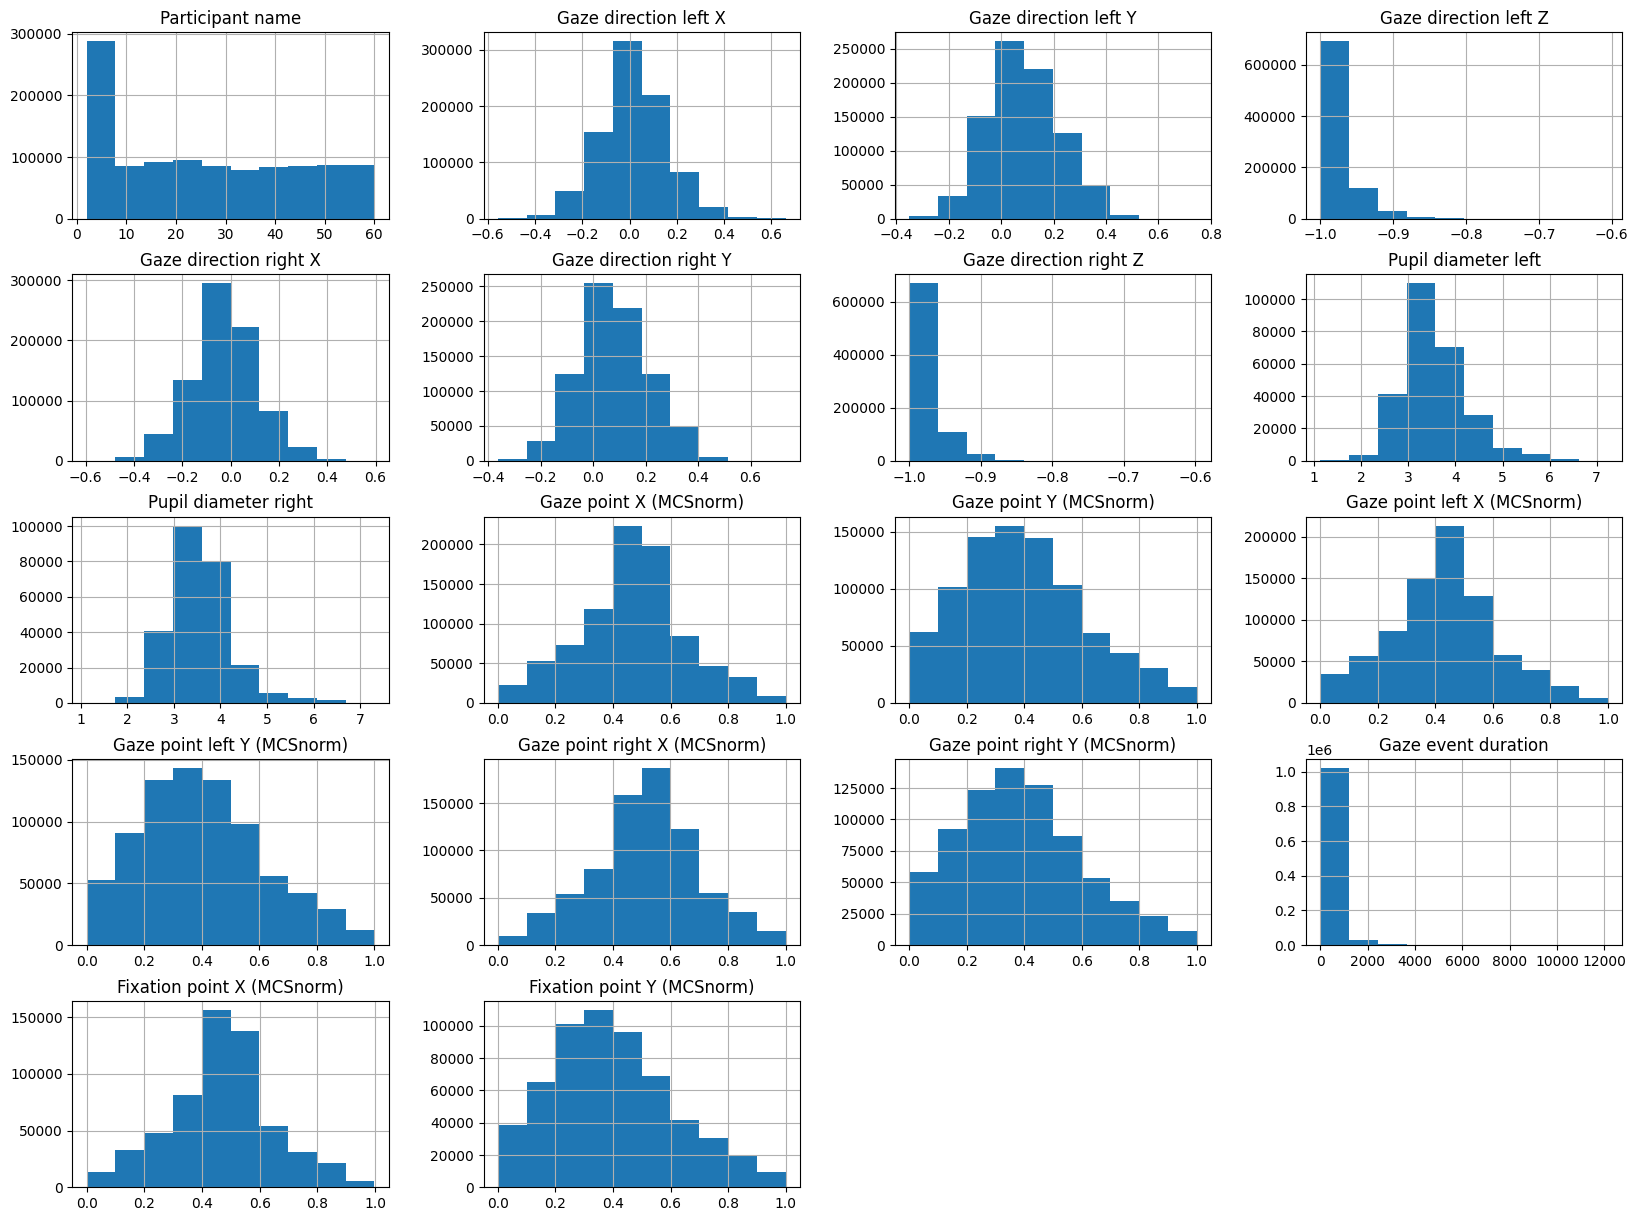

In [11]:
result_df.hist(figsize=(20, 15))
plt.show()

After making the histogram we have decided that we are going to keep the columns for the gaze point that are already normalized and in the table explaining the columns we can see that gaze point x is a combination of left and right. Also I'll be dropping any duplicate rows.

In [12]:
new_df = result_df[['Participant name','Recording name','Pupil diameter left','Pupil diameter right',
                      'Gaze point X (MCSnorm)','Gaze point Y (MCSnorm)']].drop_duplicates()
new_df

,Participant name,Recording name,Pupil diameter left,Pupil diameter right,Gaze point X (MCSnorm),Gaze point Y (MCSnorm)
0,20,Recording1,NaN,NaN,NaN,NaN
13,20,Recording1,3.38,NaN,0.3276,0.4722
14,20,Recording1,NaN,NaN,0.3303,0.4409
15,20,Recording1,NaN,NaN,0.4081,0.4031
16,20,Recording1,3.97,4.02,0.4136,0.3694
...,...,...,...,...,...,...
1066664,42,Recording4,NaN,NaN,0.7273,0.4444
1066665,42,Recording4,NaN,NaN,0.7383,0.4374
1066666,42,Recording4,NaN,3.97,0.7399,0.4370
1066667,42,Recording4,NaN,NaN,0.7319,0.4376


Now that we have selected our features we are going to add the score of the questionaires

In [13]:
ques = pd.read_csv('Questionnaires/Questionnaire_datasetIB.csv', encoding='ISO-8859-1')

Select 'Participant nr' and 'Total Score extended"

In [14]:
new_ques = ques[['Participant nr','Total Score extended']]

Merge the data frames

In [15]:
merged_df = new_df.merge(new_ques, how='left', left_on='Participant name', right_on='Participant nr')

# drop the 'Participant nr' column from the merged dataframe
merged_df = merged_df.drop(['Participant nr'], axis=1).copy()

merged_df

,Participant name,Recording name,Pupil diameter left,Pupil diameter right,Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Total Score extended
0,20,Recording1,NaN,NaN,NaN,NaN,142
1,20,Recording1,3.38,NaN,0.3276,0.4722,142
2,20,Recording1,NaN,NaN,0.3303,0.4409,142
3,20,Recording1,NaN,NaN,0.4081,0.4031,142
4,20,Recording1,3.97,4.02,0.4136,0.3694,142
...,...,...,...,...,...,...,...
713170,42,Recording4,NaN,NaN,0.7273,0.4444,95
713171,42,Recording4,NaN,NaN,0.7383,0.4374,95
713172,42,Recording4,NaN,3.97,0.7399,0.4370,95
713173,42,Recording4,NaN,NaN,0.7319,0.4376,95


Group the rows so that each row will be the participant and each of the recording row

In [16]:
grouped = merged_df.groupby(['Participant name','Recording name'])

# Get the mean for each feature in each of the trials
final_df = grouped.mean().reset_index().drop(['Recording name'],axis=1)
final_df

,Participant name,Pupil diameter left,Pupil diameter right,Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Total Score extended
0,2,3.027581,3.023616,0.432295,0.342964,127.0
1,2,2.960405,2.839182,0.503402,0.409569,127.0
2,2,3.168291,3.111407,0.502206,0.395718,127.0
3,2,3.186864,3.222987,0.440797,0.397100,127.0
4,4,2.792729,2.871934,0.519392,0.395045,120.0
...,...,...,...,...,...,...
113,58,4.146778,4.202744,0.487074,0.388933,72.0
114,60,3.282223,3.132189,0.478907,0.331713,80.0
115,60,3.270748,3.147724,0.438337,0.396756,80.0
116,60,3.221695,3.093598,0.469831,0.307359,80.0


In [17]:
final_df['Total Score extended'].min()

53.0

In [18]:
bins = [50, 75, 100, 125, 150]  # define the boundaries of the ranges
labels = [0, 1, 2, 3]  # define the labels for each range
final_df['Total Score extended'] = pd.cut(final_df['Total Score extended'], bins=bins, labels=labels)  # apply the pd.cut() function

In [19]:
final_df

,Participant name,Pupil diameter left,Pupil diameter right,Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Total Score extended
0,2,3.027581,3.023616,0.432295,0.342964,3
1,2,2.960405,2.839182,0.503402,0.409569,3
2,2,3.168291,3.111407,0.502206,0.395718,3
3,2,3.186864,3.222987,0.440797,0.397100,3
4,4,2.792729,2.871934,0.519392,0.395045,2
...,...,...,...,...,...,...
113,58,4.146778,4.202744,0.487074,0.388933,0
114,60,3.282223,3.132189,0.478907,0.331713,1
115,60,3.270748,3.147724,0.438337,0.396756,1
116,60,3.221695,3.093598,0.469831,0.307359,1


In [20]:
final_df.to_csv('control_final_features.csv', index=False)